In [ ]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
import math as m
from sklearn.model_selection import train_test_split

dados = pd.read_csv("Life_Expectancy_Data.csv")
dados = dados.interpolate(method='linear')


def plot_roc_curve(fper, tper,cor,classsificador):
    plt.plot(fper, tper, color=cor, label=classsificador)
    plt.plot([0, 1], [0, 1], color="green", linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()

dados.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Dataframe para o RLM!!!!!!!!!

In [ ]:
df_dados = pd.DataFrame(dados)
df_dados['Country'] = df_dados['Country'].factorize()[0]
df_dados['Status'] = df_dados['Status'].factorize()[0]

#df_dados.drop(dados.columns[[3]], axis=1, inplace = True)
df_dados = df_dados.interpolate(method='linear')

df_dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2738 non-null   int64  
 1   Year                             2738 non-null   int64  
 2   Status                           2738 non-null   int64  
 3   Life expectancy                  2738 non-null   float64
 4   Adult Mortality                  2738 non-null   float64
 5   infant deaths                    2738 non-null   int64  
 6   Alcohol                          2738 non-null   float64
 7   percentage expenditure           2738 non-null   float64
 8   Hepatitis B                      2738 non-null   float64
 9   Measles                          2738 non-null   int64  
 10   BMI                             2738 non-null   float64
 11  under-five deaths                2738 non-null   int64  
 12  Polio               

Regressão Linear

In [ ]:
import seaborn as sn
# realizando os teste de correlação entre os atributos da base de dados

#separando cada atributo em um vetor separado
Country = df_dados.iloc[:,0].factorize()[0]
Year = df_dados.iloc[:,1]
Status = df_dados.iloc[:,2].factorize()[0]
LifeExpectancy = df_dados.iloc[:,3]
AdultMortality = df_dados.iloc[:,4]
InfantDeaths = df_dados.iloc[:,5]
Alcohol = df_dados.iloc[:,6]
PercentageExp = df_dados.iloc[:,7].values
HepatitisB = df_dados.iloc[:,8].values
Measles = df_dados.iloc[:,9].values
BMI = df_dados.iloc[:,10].values
UnderFDeaths = df_dados.iloc[:,11].values
Polio = df_dados.iloc[:,12].values
TotalExp = df_dados.iloc[:,13].values
Diphth = df_dados.iloc[:,14].values
HIVAIDS = df_dados.iloc[:,15].values
GDP = df_dados.iloc[:,16].values
Population = df_dados.iloc[:,17].values
Thin119 = df_dados.iloc[:,18].values
Thin59 = df_dados.iloc[:,19].values
IncCompRes = df_dados.iloc[:,20].values
Schooling = df_dados.iloc[:,21].values

#analisando o relacionamento entre as variáveis
# plt.figure(figsize=(20, 20))
# sn.set(font_scale=1)
# sn.heatmap(df_dados.corr(),annot=True,vmin=-1, vmax=1,linewidth=.5,fmt=".2f");
# plt.show()

[[19.1]
 [18.6]
 [18.1]
 ...
 [26.3]
 [25.9]
 [25.5]]
BMI
b em X:  59.1498281772693
a em X:  [0.26547448]
Coef.Det.:  0.306491659593211


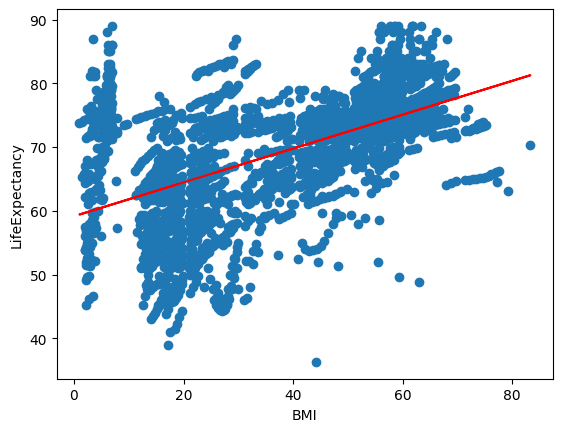

[[0.479]
 [0.476]
 [0.47 ]
 ...
 [0.427]
 [0.427]
 [0.434]]
Income composition of resources
b em X:  48.14054121736264
a em X:  [33.40242055]
Coef. Det.:  0.5279022570540104


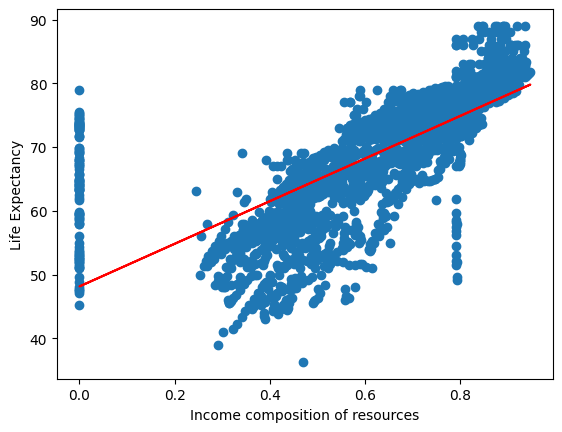

In [ ]:
#instanciando e treinando os modelos lineares
BMI = BMI.reshape(-1,1) #uma coluna
print(BMI)
modelo1 = LinearRegression()
modelo1.fit(BMI,LifeExpectancy)

print ("BMI")
print ("b em X: ", modelo1.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo1.coef_) #obtendo a inclinação do modelo
print ("Coef.Det.: ",modelo1.score(BMI, LifeExpectancy)) #obtendo o coeficiente de determinação do modelo

plt.scatter(BMI, LifeExpectancy)
plt.xlabel("BMI") #variável explicativa
plt.ylabel("LifeExpectancy") #variável dependente
plt.plot(BMI, modelo1.predict(BMI),color='red') #plotando a reta do modelo
plt.show()


IncCompRes = IncCompRes.reshape(-1,1)
print(IncCompRes)
modelo2 = LinearRegression()
modelo2.fit(IncCompRes, LifeExpectancy)

print ("Income composition of resources")
print ("b em X: ", modelo2.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo2.coef_) #obtendo a inclinação do modelo
print ("Coef. Det.: ",modelo2.score(IncCompRes, LifeExpectancy)) #obtendo o coeficiente de determinação do modelo

plt.scatter(IncCompRes, LifeExpectancy)
plt.xlabel("Income composition of resources") #variável explicativa
plt.ylabel("Life Expectancy") #variável dependente
plt.plot(IncCompRes, modelo2.predict(IncCompRes),color='red') #plotando a reta do modelo
plt.show()

In [ ]:
#realizando predições com base em variáveis individuais

#BMI
#qual a expectativa de vida da pessoa com um BMI = 23.5
print("Life Expectancy: ",modelo1.intercept_ + modelo1.coef_ * 23.5," years")

#qual a expectativa de vida da pessoa com um BMI = 32
print("Life Expectancy: ",modelo1.intercept_ + modelo1.coef_ * 32," years")

Life Expectancy:  [65.38847842]  years
Life Expectancy:  [67.64501149]  years


In [ ]:
#avaliando os resíduos dos modelos contruídos
#modelo1 --> BMI
#modelo2 --> IncCompRes

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("BMI")
predict = modelo1.predict(BMI)
print("Erro médio quadrático (MSE): ", mean_squared_error(LifeExpectancy,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(LifeExpectancy,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(LifeExpectancy,predict))

print()
print("Income Composition of Resources")
predict = modelo2.predict(IncCompRes)
print("Erro médio quadrático (MSE): ", mean_squared_error(LifeExpectancy,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(LifeExpectancy,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(LifeExpectancy,predict))



BMI
Erro médio quadrático (MSE):  63.13946700046898
Raiz quadrada do Erro médio quadrático (RMSE):  7.946034671486715
Erro médio absoluto (MAE):  5.999750435473925

Income Composition of Resources
Erro médio quadrático (MSE):  42.98145836897911
Raiz quadrada do Erro médio quadrático (RMSE):  6.556024585751575
Erro médio absoluto (MAE):  4.460119906435228


In [ ]:
# fazendo o data frame dessa vez dropando a coluna dos valores de expectativa de vida

df_dados = pd.DataFrame(dados)
df_dados['Country'] = df_dados['Country'].factorize()[0]
df_dados['Status'] = df_dados['Status'].factorize()[0]

df_dados.drop(dados.columns[[3]], axis=1, inplace = True)
df_dados = df_dados.interpolate(method='linear')

#df_dados.info()

#construindo um modelo baseado em múltiplas variáveis explicativas

RegMultipla = LinearRegression().fit(df_dados, LifeExpectancy)

print ("Todas as variáveis")
print ("b em X: ", RegMultipla.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", RegMultipla.coef_) #obtendo a inclinação do modelo
print ("Coef. Det.: ",RegMultipla.score(df_dados,LifeExpectancy)) #obtendo o coeficiente de determinação do modelo

predict = RegMultipla.predict(df_dados)
print("\nAnálise de Resíduos")
print("Erro médio quadrático (MSE): ", mean_squared_error(LifeExpectancy,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(LifeExpectancy,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(LifeExpectancy,predict))

Todas as variáveis
b em X:  90.8888950440721
a em X:  [ 1.94571059e-03 -1.82808647e-02  1.37976809e+00 -1.79606761e-02
  9.91561142e-02  2.16778820e-02  5.98579672e-05 -1.38916116e-02
 -8.82313586e-06  4.05926208e-02 -7.43537530e-02  2.51793594e-02
  5.96660774e-02  3.56691401e-02 -4.86641235e-01  3.93741824e-05
  3.08068088e-11 -7.25029639e-02  2.78868911e-03  7.53553241e+00
  6.64401816e-01]
Coef. Det.:  0.8261988859456614

Análise de Resíduos
Erro médio quadrático (MSE):  15.823471854775164
Raiz quadrada do Erro médio quadrático (RMSE):  3.9778727801144123
Erro médio absoluto (MAE):  2.964964278879934


In [ ]:
#construindo um modelo de regressão com hold-out
#neste caso será usado 50% para treino e 50% para teste

# divisao para a regressao linear multipla (metade metade)

resultados = open('resultados_RLM.txt', 'w')


for i in range(1, 20+1):
    x_treino,x_teste,y_treino,y_teste=train_test_split(df_dados, dados['Life expectancy '],test_size=0.5)

    Modelo = LinearRegression().fit(x_treino, y_treino)

    # print("Modelo construído")
    # print ("b em X: ", Modelo.intercept_) #obtendo o termo independente do modelo
    # print ("a em X: ", Modelo.coef_) #obtendo a inclinação do modelo

    # print ("\n\nTodas as variáveis sobre o conjunto de treino")
    # print ("Coef. Det. sobre o treino: ",Modelo.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo
    # predict = Modelo.predict(x_treino)
    # print ("Análise de Resíduos")
    # print ("Erro médio quadrático (MSE): ", mean_squared_error(y_treino,predict,squared=True))
    # print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_treino,predict,squared=False))
    # print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_treino,predict))


    # print ("\n\nTodas as variáveis sobre o conjunto de teste")
    # print ("Coef. Det. sobre o teste: ",Modelo.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
    predict = Modelo.predict(x_teste)
    print ("Análise de Resíduos")
    print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
    print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
    print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))
    resultados.write(f"{mean_squared_error(y_teste,predict,squared=False)}\n")

resultados.close()


Análise de Resíduos
Erro médio quadrático (MSE):  15.907322890971493
Raiz quadrada do Erro médio quadrático (RMSE):  3.988398537128843
Erro médio absoluto (MAE):  2.97124425007769
Análise de Resíduos
Erro médio quadrático (MSE):  17.2914700588873
Raiz quadrada do Erro médio quadrático (RMSE):  4.158301342962929
Erro médio absoluto (MAE):  3.0487010950099562
Análise de Resíduos
Erro médio quadrático (MSE):  16.276089847704455
Raiz quadrada do Erro médio quadrático (RMSE):  4.0343636236343965
Erro médio absoluto (MAE):  3.020335582705734
Análise de Resíduos
Erro médio quadrático (MSE):  16.135272470754
Raiz quadrada do Erro médio quadrático (RMSE):  4.016873469597219
Erro médio absoluto (MAE):  3.044362651759504
Análise de Resíduos
Erro médio quadrático (MSE):  16.863563749274338
Raiz quadrada do Erro médio quadrático (RMSE):  4.10652696926178
Erro médio absoluto (MAE):  3.007653596644142
Análise de Resíduos
Erro médio quadrático (MSE):  15.877274525164449
Raiz quadrada do Erro médio qua

K-Neighbors Regression

Dataframe para os demais métodos!!!!!!

In [ ]:
df_dados = pd.DataFrame(dados)
df_dados['Country'] = df_dados['Country'].factorize()[0]
df_dados['Status'] = df_dados['Status'].factorize()[0]

df_dados.drop(dados.columns[[3]], axis=1, inplace = True)
df_dados = df_dados.interpolate(method='linear')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# parametros pra mudar: K, distance

grid_parameters = ParameterGrid({'k': list(range(1,11)), 'w' : ['distance', 'uniform']})
resultados = open('resultados_KNR.txt', 'w')


for it in range(1, 20+1):
    lowest_rmse = 1000000
    print('iteracao ', it)
    # eh necessario rearranjar os conjuntos de treino, validacao e teste a cada iteracao
    # e encontrar os melhores parametros em cada um desses rearranjos
    x_treino,x_temp,y_treino,y_temp=train_test_split(df_dados, dados['Life expectancy '],test_size=0.5)
    x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_temp,y_temp,test_size=0.5)

    # fazendo grid search pelos melhores parametros para o conjunto de dados atual
    for i in grid_parameters:
        # print('grid search sendo realizado')
        knr = KNeighborsRegressor(n_neighbors= i['k'], weights = i['w'])
        knr.fit(x_treino, y_treino)
        opiniao = knr.predict(x_validacao)

        mae = mean_absolute_error(y_validacao, opiniao)
        mse = mean_squared_error(y_validacao, opiniao, squared=True)
        rmse = mean_squared_error(y_validacao, opiniao, squared=False)
        # print("MAE = ", mae)
        # print("MSE = ", mse)
        # print("RMSE = ", rmse)
        if(rmse < lowest_rmse):
            lowest_rmse = rmse
            best_param_knr = i
    print('melhores parametros knr = ', best_param_knr['k'], ' e ', best_param_knr['w'])
    knr = KNeighborsRegressor(n_neighbors= best_param_knr['k'], weights = best_param_knr['w'])
    knr.fit(x_treino, y_treino)
    opiniao = knr.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao)
    mse = mean_squared_error(y_teste, opiniao, squared=True)
    rmse = mean_squared_error(y_teste, opiniao, squared=False)
    resultados.write(f"{rmse}\n")
    print("MAE = ", mae)
    print("MSE = ", mse)
    print("RMSE = ", rmse)

resultados.close()

iteracao  1
melhores parametros knr =  3  e  uniform
MAE =  8.155644768856448
MSE =  108.1602193836172
RMSE =  10.40001054728394
iteracao  2
melhores parametros knr =  10  e  uniform
MAE =  7.304788321167882
MSE =  86.97785883211678
RMSE =  9.326192086383209
iteracao  3
melhores parametros knr =  10  e  uniform
MAE =  7.3172700729927005
MSE =  89.3579189781022
RMSE =  9.452931766288287
iteracao  4
melhores parametros knr =  8  e  uniform
MAE =  7.349197080291971
MSE =  86.37201859032847
RMSE =  9.293654748823439
iteracao  5
melhores parametros knr =  10  e  uniform
MAE =  7.653722627737225
MSE =  92.34666029197082
RMSE =  9.609716972521658
iteracao  6
melhores parametros knr =  9  e  uniform
MAE =  7.596374695863747
MSE =  88.8690478958277
RMSE =  9.427038129541415
iteracao  7
melhores parametros knr =  10  e  uniform
MAE =  7.769145985401461
MSE =  95.17510113138687
RMSE =  9.755772708062999
iteracao  8
melhores parametros knr =  10  e  uniform
MAE =  7.418868613138686
MSE =  89.57109

KeyboardInterrupt: ignored

Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# parametros pra mudar: kernel, C
grid_parameters = ParameterGrid({'k': ['linear', 'poly', 'rbf', 'sigmoid'],
                                 'c' : [0.001, 0.1, 1.0, 10.0, 100.0]})

resultados = open('resultados_SVR.txt', 'w')


for it in range(1, 20+1):
    x_treino,x_temp,y_treino,y_temp=train_test_split(df_dados, dados['Life expectancy '],test_size=0.5)
    x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_temp,y_temp,test_size=0.5)
    lowest_rmse = 1000000
    print('iteracao ', it)
    for i in grid_parameters:
        # svr = SVR(kernel = i['k'], C = i['c'], verbose=True)
        svr = make_pipeline(StandardScaler(), SVR(C=i['c'], kernel = i['k']))
        # print("entrando no fit")
        svr.fit(x_treino, y_treino)
        # print("saindo do fit")
        opiniao = svr.predict(x_validacao)

        mae = mean_absolute_error(y_validacao, opiniao)
        mse = mean_squared_error(y_validacao, opiniao, squared=True)
        rmse = mean_squared_error(y_validacao, opiniao, squared=False)
        # print("MAE = ", mae)
        # print("MSE = ", mse)
        # print("RMSE = ", rmse)
        if(rmse < lowest_rmse):
            lowest_rmse = rmse
            best_param_svr = i
    print('melhores parametros svr = ', best_param_svr['k'], ' e ', best_param_svr['c'])
    svr = SVR(kernel = best_param_svr['k'], C = best_param_svr['c'])
    svr.fit(x_treino, y_treino)
    opiniao = svr.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao)
    mse = mean_squared_error(y_teste, opiniao, squared=True)
    rmse = mean_squared_error(y_teste, opiniao, squared=False)
    resultados.write(f"{rmse}\n")
    print("MAE = ", mae)
    print("MSE = ", mse)
    print("RMSE = ", rmse)

resultados.close()

iteracao  1


KeyboardInterrupt: ignored

Multilayer Perceptron

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
from skopt import gp_minimize
from sklearn.neural_network import MLPRegressor
import warnings
import numpy as np

resultados = open("resultados_MLP.txt", 'w')

def treinar_modelo(params):
    hls = params[0]
    act = params[1]
    maxi = params[2]
    lr = params[3]
    n_hidden_layers = params[4]

    hls_param = (hls,) * n_hidden_layers

    with warnings.catch_warnings():
        mlp = MLPRegressor(hidden_layer_sizes = hls_param, activation = act, max_iter = maxi, learning_rate = lr)
        mlp.fit(x_treino, y_treino)

        opiniao = mlp.predict(x_validacao)

    return mean_squared_error(y_validacao, opiniao, squared = False)


hidden_layer_sizes = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
n_hidden_layers = [1,2,3,4,5,6,7,8,9]

#tuple_list = [(15,), (15, 15), (15, 15, 15)]
#tuple_list = tuple(tuple_list)
#print(tuple_list)

for i in range(1, 20+1):

    print('iteracao ', i, ' ------------------------------')
    x_treino,x_temp,y_treino,y_temp=train_test_split(df_dados, dados['Life expectancy '],test_size=0.5)
    x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_temp,y_temp,test_size=0.5)
    params_list = [ hidden_layer_sizes,
                    ('identity', 'logistic', 'tanh', 'relu'),
                    tuple(range(250,3500 + 1, 10)),
                    ('constant','invscaling', 'adaptive'),
                    n_hidden_layers
                    ]

    with warnings.catch_warnings():
        resultado = gp_minimize(treinar_modelo,
                                params_list,
                                random_state = 1,
                                verbose = 0,
                                n_calls = 45,
                                n_random_starts = 20)

    print(resultado.x)

    hls_param = (resultado.x[0],) * resultado.x[4]

    with warnings.catch_warnings():
        mlp = MLPRegressor(hidden_layer_sizes = hls_param, activation = resultado.x[1], max_iter = resultado.x[2],
                        learning_rate = resultado.x[3])
        mlp.fit(x_treino, y_treino)
        opiniao = mlp.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao)
    mse = mean_squared_error(y_teste, opiniao, squared=True)
    rmse = mean_squared_error(y_teste, opiniao, squared=False)
    resultados.write(f"{rmse}\n")
    print("MAE = ", mae)
    print("MSE = ", mse)
    print("RMSE = ", rmse)

resultados.close()

iteracao  1  ------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (290) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (890) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (840) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

[75, 'tanh', 1080, 'invscaling', 7]
MAE =  7.752566541819237
MSE =  87.82384977864992
RMSE =  9.37143797816802
iteracao  2  ------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (290) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[50, 'tanh', 2990, 'constant', 3]
MAE =  8.033055992167004
MSE =  94.86680147480914
RMSE =  9.73995900786082
iteracao  3  ------------------------------


Random Forest

In [ ]:
from skopt import gp_minimize
from sklearn.ensemble import RandomForestRegressor
import warnings

resultados = open("resultados_RF.txt", 'w')

def treinar_modelo(params):
    nest = params[0]
    crit = params[1]
    maxdepth = params[2]
    split = params[3]
    leaf = params[4]


    rf = RandomForestRegressor(n_estimators = nest, criterion = crit, max_depth = maxdepth, min_samples_split = split, min_samples_leaf = leaf)
    rf.fit(x_treino, y_treino)

    opiniao = rf.predict(x_validacao)

    return mean_squared_error(y_validacao, opiniao, squared = False)


for i in range(1, 20+1):
    x_treino,x_temp,y_treino,y_temp=train_test_split(df_dados, dados['Life expectancy '],test_size=0.5)
    x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_temp,y_temp,test_size=0.5)
    params_list = [tuple(range(50, 100, 10)), ('squared_error', 'absolute_error', 'friedman_mse', 'poisson'),
                   tuple(range(10, 100, 10)), tuple(range(2, 10, 2)),
                   tuple(range(1, 10, 1))]


    resultado = gp_minimize(treinar_modelo,
                            params_list,
                            random_state = 1,
                            verbose = 0,
                            n_calls = 30,
                            n_random_starts = 10)

    print(resultado.x)


    rf = RandomForestRegressor(n_estimators = resultado.x[0], criterion = resultado.x[1], max_depth = resultado.x[2],
                               min_samples_split = resultado.x[3], min_samples_leaf = resultado.x[4])
    rf.fit(x_treino, y_treino)
    opiniao = rf.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao)
    mse = mean_squared_error(y_teste, opiniao, squared=True)
    rmse = mean_squared_error(y_teste, opiniao, squared=False)
    resultados.write(f"{rmse}\n")
    print("MAE = ", mae)
    print("MSE = ", mse)
    print("RMSE = ", rmse)

resultados.close()


KeyboardInterrupt: ignored

Gradient Boosting

In [ ]:
from skopt import gp_minimize
from sklearn.ensemble import GradientBoostingRegressor

resultados = open('resultados_GB.txt', 'w')

def treinar_modelo(params):
    nest = params[0]
    loss = params[1]
    maxdepth = params[2]
    lr = params[3] / 100
    split = params[4]
    leaf = params[5]


    gb = GradientBoostingRegressor(n_estimators = nest, loss = loss, max_depth = maxdepth, learning_rate = lr,
                                   min_samples_split = split, min_samples_leaf = leaf)
    gb.fit(x_treino, y_treino)

    opiniao = gb.predict(x_validacao)

    return mean_squared_error(y_validacao, opiniao, squared = False)


for i in range(1, 20+1):
    x_treino,x_temp,y_treino,y_temp=train_test_split(df_dados, dados['Life expectancy '],test_size=0.5)
    x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_temp,y_temp,test_size=0.5)
    params_list = [tuple(range(50, 100, 10)), ('squared_error', 'absolute_error', 'huber', 'quantile'),
                   tuple(range(10, 100, 10)), tuple(range(1, 10, 1)), tuple(range(2, 10, 2)),
                   tuple(range(1, 10, 1))]


    resultado = gp_minimize(treinar_modelo,
                            params_list,
                            random_state = 1,
                            verbose = 0,
                            n_calls = 30,
                            n_random_starts = 10)

    print(resultado.x)


    gb = GradientBoostingRegressor(n_estimators = resultado.x[0], loss = resultado.x[1], max_depth = resultado.x[2],
                                   learning_rate = resultado.x[3]/100, min_samples_split = resultado.x[4], min_samples_leaf = resultado.x[5])
    gb.fit(x_treino, y_treino)
    opiniao = gb.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao)
    mse = mean_squared_error(y_teste, opiniao, squared=True)
    rmse = mean_squared_error(y_teste, opiniao, squared=False)
    resultados.write(f"{rmse}\n")
    print("MAE = ", mae)
    print("MSE = ", mse)
    print("RMSE = ", rmse)

resultados.close()

[90, 'squared_error', 20, 7, 2, 7]
MAE =  1.174009544789303
MSE =  3.544415622495505
RMSE =  1.882661844967254
[90, 'huber', 10, 6, 2, 4]
MAE =  1.1600151469895768
MSE =  3.29157211268382
RMSE =  1.8142690298530204
[80, 'huber', 10, 8, 4, 7]
MAE =  1.3667797698597155
MSE =  5.0518671523728145
RMSE =  2.2476359029818007
[60, 'huber', 60, 9, 6, 8]
MAE =  1.2868483862271693
MSE =  4.62192249794781
RMSE =  2.1498656930021953
[80, 'huber', 10, 7, 2, 8]
MAE =  1.1918358158364957
MSE =  3.5965885926759116
RMSE =  1.89646739826339
[90, 'huber', 70, 8, 4, 8]
MAE =  1.2580930760218165
MSE =  4.207376169911202
RMSE =  2.051188964944771
[80, 'squared_error', 60, 8, 6, 9]
MAE =  1.2429758934419468
MSE =  3.9193601975221433
RMSE =  1.9797374062036974
[80, 'huber', 50, 8, 4, 8]
MAE =  1.2467157360875358
MSE =  4.0941411245505
RMSE =  2.023398409743
[80, 'squared_error', 20, 9, 8, 7]
MAE =  1.1449221229134443
MSE =  3.0599859711723596
RMSE =  1.7492815585755084
[90, 'squared_error', 30, 9, 6, 6]
MAE =

In [ ]:
def get_values(file, var_ob):
    for line in file:
        value = float(line)
        var_ob.append(value)

rlm_values = []
rlm = open("resultados_RLM.txt", 'r')

get_values(rlm, rlm_values)
print(rlm_values)

knr_values = []
knr = open("resultados_KNR.txt", 'r')
get_values(knr, knr_values)
print(knr_values)

svr_values = []
svr = open("resultados_SVR.txt", 'r')
get_values(svr, svr_values)
print(svr_values)

mlp_values = []
mlp = open("resultados_MLP.txt", 'r')
get_values(mlp, mlp_values)
print(mlp_values)

rf_values = []
rf = open("resultados_RF.txt", 'r')
get_values(rf, rf_values)
print(rf_values)

gb_values = []
gb = open("resultados_GB.txt", 'r')
get_values(gb, gb_values)
print(gb_values)

[3.962796431, 4.003534298, 4.076504247, 3.906200371, 4.122354164, 4.110540149, 3.912938048, 3.878369438, 3.900928721, 3.98383944, 4.0206942, 4.066407831, 4.080463038, 4.087578238, 3.873454764, 4.09214507, 4.229677566, 4.075223421, 4.062090779, 4.067002682]
[9.42185, 9.19938, 9.17309, 9.467, 9.28025, 9.24433, 9.01472, 9.10448, 9.61194, 9.29157, 9.14924, 9.40732, 9.70501, 9.00107, 8.9787, 9.31578, 9.19044, 9.43889, 9.42765, 9.15611]
[9.56200470260666, 9.94423717847379, 9.966867059754, 9.68364981346453, 9.7435177509762, 9.91390248326217, 9.85844076209593, 9.59546999775468, 9.62032104129509, 10.3210010317489, 10.0799144673711, 10.0922870138739, 9.89886319117011, 10.572705900695, 9.91831698851367, 9.72235699032259, 9.89195313438648, 9.9057949145208, 9.86486940029472, 9.90270892823607]
[9.512956446154101, 9.42136893736896, 9.711477218473231, 9.80295409910001, 9.633694290197754, 10.002086690718835, 9.421503068163329, 9.544916563272228, 9.524092634902154, 9.286614388840182, 9.514352699521128, 

In [ ]:
from scipy import stats
from decimal import Decimal, getcontext

getcontext().prec = 28

def mann_whitney(v1, v2, str1, str2):
    # print("v1 = ", v1)
    # print("v2 = ", v2)
    pvalue = stats.mannwhitneyu(v1, v2).pvalue
    if(pvalue < 0.05):
        print("os regressores ", str1, " e ", str2, " são discrepantes, com pvalue = ", pvalue)
    else:
        print("os regressores ", str1, " e ", str2, " não são discrepantes, com pvalue = ", pvalue)

# realizando o teste de kruskal wallis para verificar se há diferença significativa entre os regressores
kruskal_resul = stats.kruskal(rlm_values, knr_values, svr_values, mlp_values, rf_values, gb_values)
if(kruskal_resul.pvalue < 0.05):
    print("Há diferença estatisticamente significativa entre os regressores, com pvalue = ", kruskal_resul.pvalue)
else:
    print("Não há diferença estatisticamente significativa entre os regressores, com pvalue = ", kruskal_resul.pvalue)


# realizando os teste mann whitney par a par
mann_whitney(rlm_values, knr_values, 'RLM', 'KNR')
mann_whitney(rlm_values, svr_values, 'RLM', 'SVR')
mann_whitney(rlm_values, mlp_values, 'RLM', 'MLP')
mann_whitney(rlm_values, rf_values, 'RLM', 'RF')
mann_whitney(rlm_values, gb_values, 'RLM', 'GB')

mann_whitney(knr_values, svr_values, 'KNR', 'SVR')
mann_whitney(knr_values, mlp_values, 'KNR', 'MLP')
mann_whitney(knr_values, rf_values, 'KNR', 'RF')
mann_whitney(knr_values, gb_values, 'KNR', 'GB')

mann_whitney(svr_values, mlp_values, 'SVR', 'MLP')
mann_whitney(svr_values, rf_values, 'SVR', 'RF')
mann_whitney(svr_values, gb_values, 'SVR', 'GB')

mann_whitney(mlp_values, rf_values, 'MLP', 'RF')
mann_whitney(mlp_values, gb_values, 'MLP', 'GB')

mann_whitney(rf_values, gb_values, 'RF', 'GB')

Há diferença estatisticamente significativa entre os regressores, com pvalue =  8.539450592454532e-22
os regressores  RLM  e  KNR  são discrepantes, com pvalue =  6.795615128173358e-08
os regressores  RLM  e  SVR  são discrepantes, com pvalue =  6.795615128173358e-08
os regressores  RLM  e  MLP  são discrepantes, com pvalue =  6.795615128173358e-08
os regressores  RLM  e  RF  são discrepantes, com pvalue =  6.795615128173358e-08
os regressores  RLM  e  GB  são discrepantes, com pvalue =  6.795615128173358e-08
os regressores  KNR  e  SVR  são discrepantes, com pvalue =  1.6570792933858787e-07
os regressores  KNR  e  MLP  são discrepantes, com pvalue =  0.008354827335644516
os regressores  KNR  e  RF  são discrepantes, com pvalue =  6.795615128173358e-08
os regressores  KNR  e  GB  são discrepantes, com pvalue =  6.795615128173358e-08
os regressores  SVR  e  MLP  são discrepantes, com pvalue =  9.747975903084567e-06
os regressores  SVR  e  RF  são discrepantes, com pvalue =  6.7956151281